THE PERFORMANCE OF MACHINE LEARNING TECHNIQUES FOR CHURN PREDICTION IN TELECOMMUNICATIONS

Churn Prediction is the basis of this project. The dataset used in this study was obtained from Kaggle,an open online community 
for experts in machine learning. This dataset has columns 21 and 7044 rows.  


FIRST, WE IMPORTED THE REQUIRED LIBRARIES AND LOADED THE DATASET.

In [2]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import matplotlib.style as style
import random
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.feature_selection import SequentialFeatureSelector as sfs,RFE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score, recall_score, f1_score
from sklearn.metrics import cohen_kappa_score,roc_auc_score,roc_curve,plot_confusion_matrix,plot_roc_curve
from sklearn.feature_selection import SequentialFeatureSelector as sfs,RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from itertools import cycle
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.model_selection import GridSearchCV

In [2]:
dt = pd.read_csv("Churn.csv")
# Dropping the 'customerID' column as it's a unique identifier and not useful for modeling
dt = dt.drop('customerID', axis=1)
# Display the first few rows of the dataframe to verify the drop

dt.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# reviewing the 5 buttom rows
dt.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


DATA STRUCTURE AND STATISTICAL ANALYSIS

In [4]:
# Previewing the dataseat (using top 10 rows)
dt.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


DATA PREPARATION 

The main goals is to prepare, clean, and ready the data for modelling, however,it has 22 duplicate but no missing values in the dataset

In [5]:
dt.loc[dt.TotalCharges.str.contains(' '),'TotalCharges'] = np.nan


In [6]:
dt = dt[dt.TotalCharges.notnull()].copy()
dt.TotalCharges = dt.TotalCharges.astype(float)

In [7]:
dt.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#Checking the shape of the dataset

dt.shape

(7032, 20)

In [9]:
#Checking the shape of the dataset
dt.size

140640

In [10]:
#Checking for Duplicate values
dt.duplicated().sum()

22

In [11]:
# remove the duplicate
dt= dt.drop_duplicates()

In [12]:
#Recheck for Duplicate values
dt.duplicated().sum()

0

In [13]:
#Getting info about the dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null   object 


In [14]:
# statiscical description 
dt.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388
std,0.369180,24.520441,30.064769,2266.820832
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,56.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
# the list of the column in the dataset
dt.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
#check for missing value
dt.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
#Checking hte numbe rof categorical columns in the dataset
cat = dt.select_dtypes(include='object').columns
len(cat)

16

EXPLORATORY DATA ANALYSIS (EDA)

Value counts and visualisation is used to see the distribution of the data and the interaction between the variables in order 
to learn more about the data characteristics, patterns, and trends. To do this, univariate and bivariate analysis were 
performed.

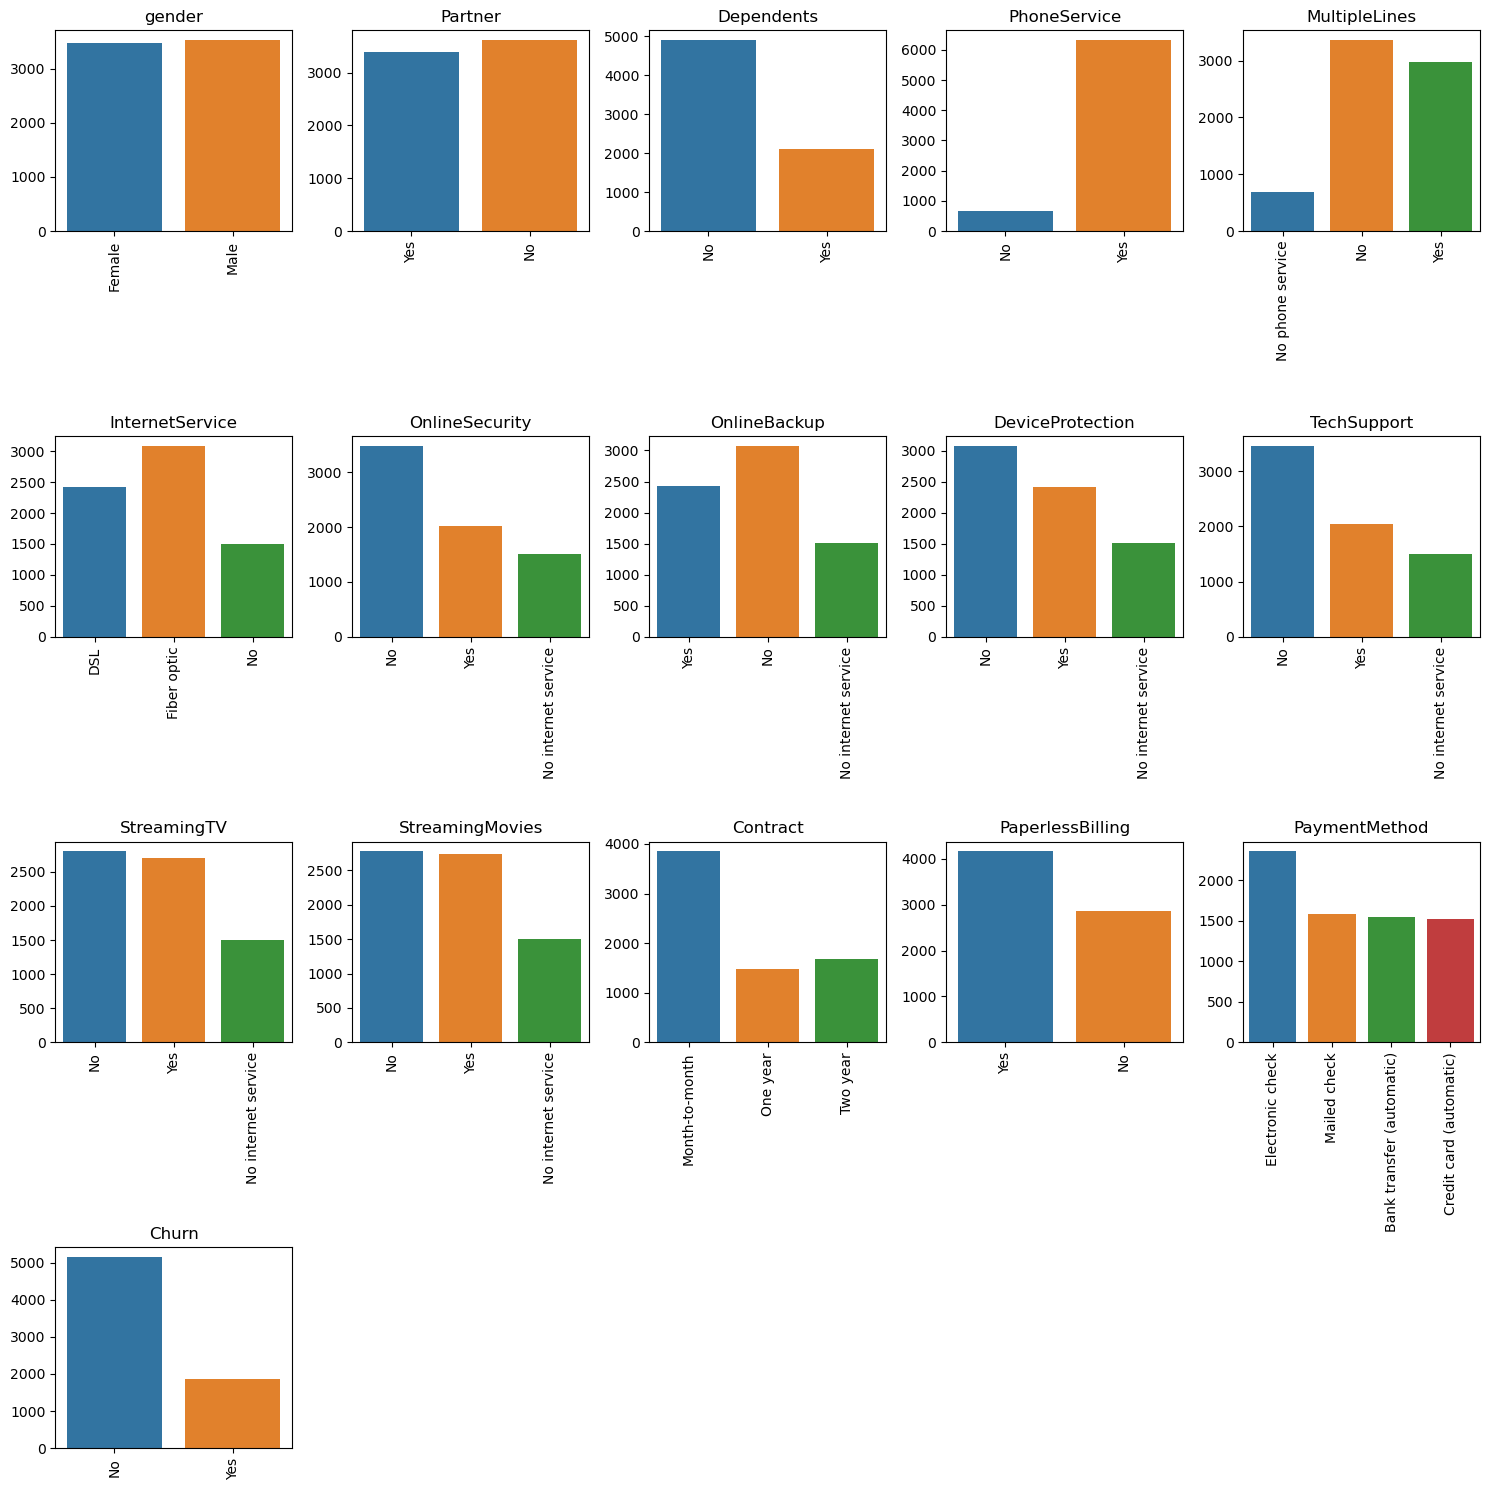

In [18]:
#visualizing the distribution of the categorical columns

num_plots = len(cat)
num_cols = 5
num_rows = num_plots // num_cols + int(num_plots % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(cat):
    sns.countplot(x=col, data=dt, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelrotation=90)
for i in range(num_plots, num_rows*num_cols):
    axes[i].set_visible(False)

fig.tight_layout()
plt.show()

In [19]:
# numerical columns
num = dt.select_dtypes(include=np.number).columns
len(num)

4

In [20]:
#Checking for the unique values in the numerical column
for i in num:
    print("The no.of unique values in",i,"are: ",dt.loc[:,i].nunique())

The no.of unique values in SeniorCitizen are:  2
The no.of unique values in tenure are:  72
The no.of unique values in MonthlyCharges are:  1584
The no.of unique values in TotalCharges are:  6530


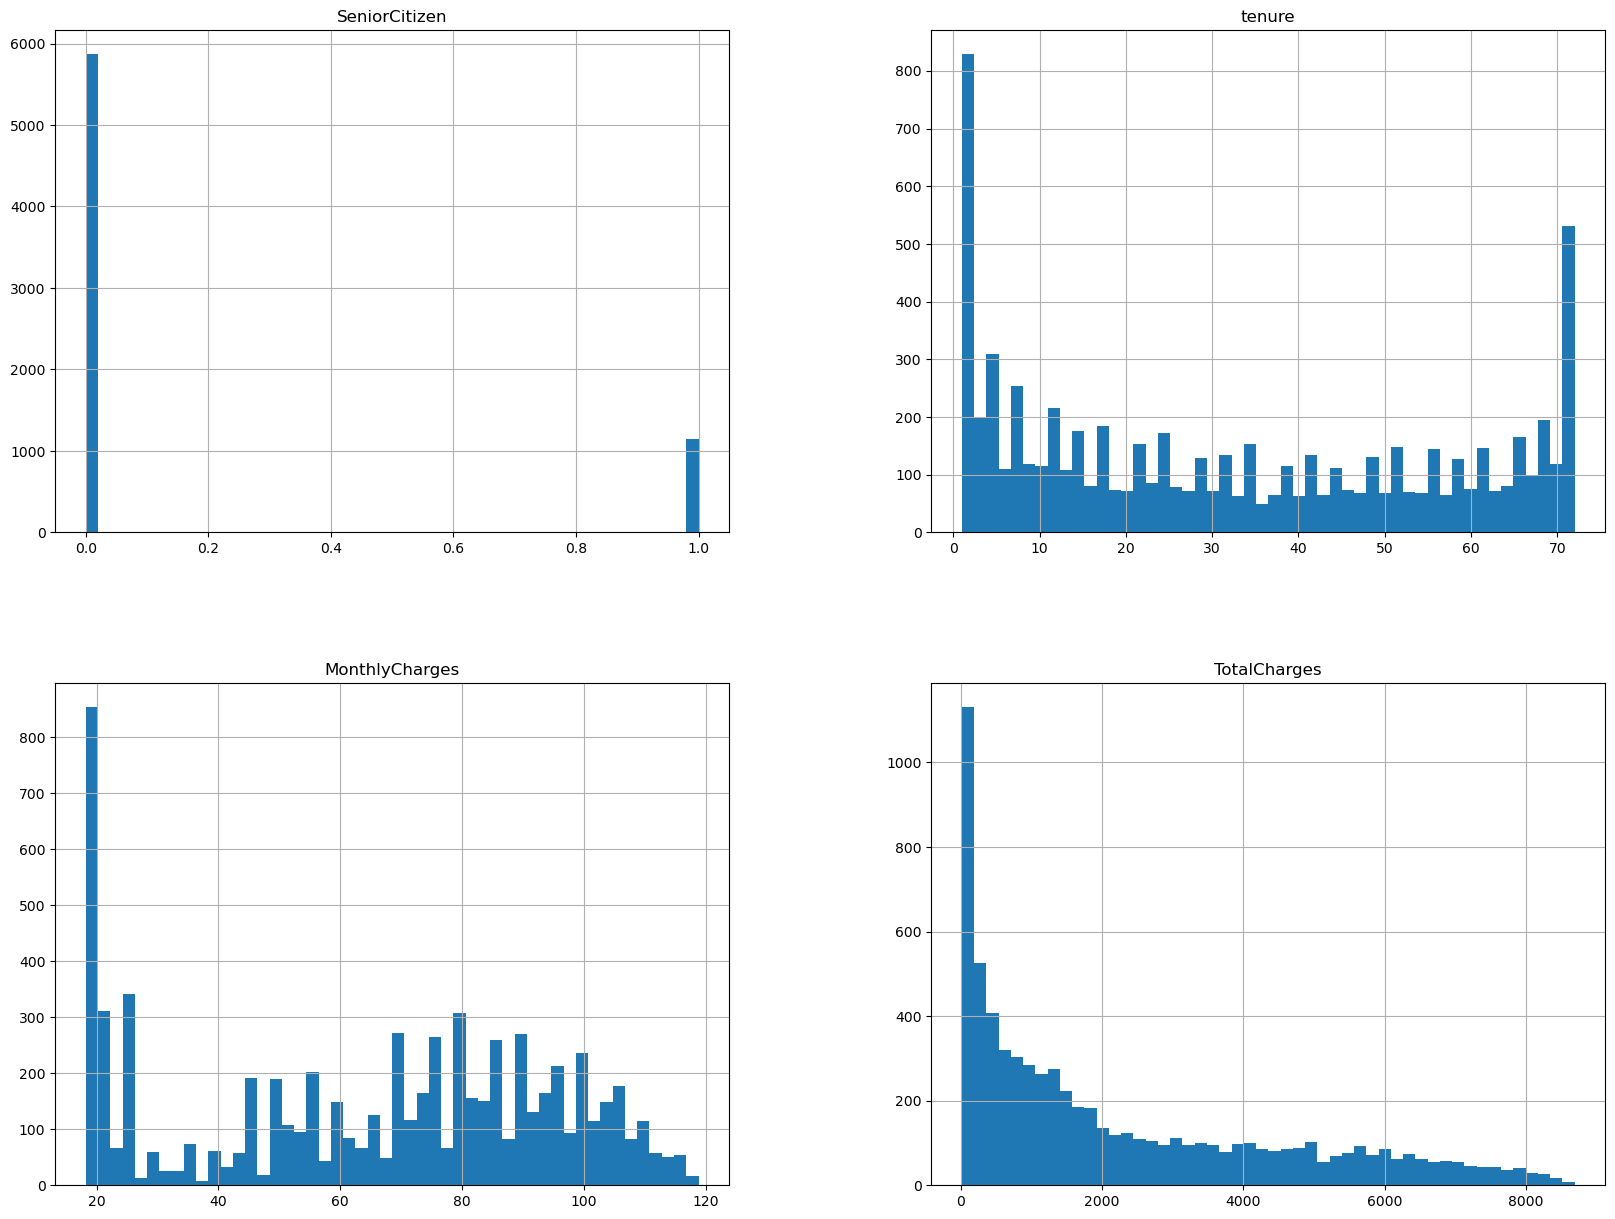

In [21]:
# visualizing the distribution of our numerical columns
dt.hist(bins=50, figsize=(20,15))
plt.show()

Verifying the data type and verifying value counts for categorical columns

In [22]:
dt['SeniorCitizen'].value_counts()

0    5869
1    1141
Name: SeniorCitizen, dtype: int64

In [23]:
dt['tenure'].value_counts()

1     591
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

In [24]:
dt['MonthlyCharges'].value_counts()

20.05     59
19.85     44
19.95     44
19.90     43
19.65     42
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1584, dtype: int64

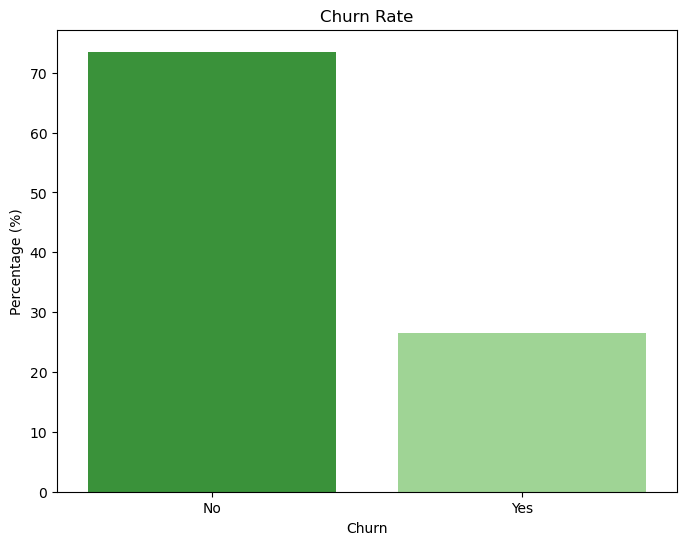

In [25]:
# Visualize distribution of customer churn

# Distribution of Churn Rate
churn_rate = dt['Churn'].value_counts(normalize=True) * 100

# Plotting the churn rate with the green color scheme
plt.figure(figsize=(8, 6))
# Define the color for each churn category, 'No' and 'Yes'
custom_palette = ["#2ca02c", "#98df8a"]  
sns.barplot(x=churn_rate.index, y=churn_rate.values, palette=custom_palette)
plt.title('Churn Rate')
plt.xlabel('Churn')
plt.ylabel('Percentage (%)')
plt.show()

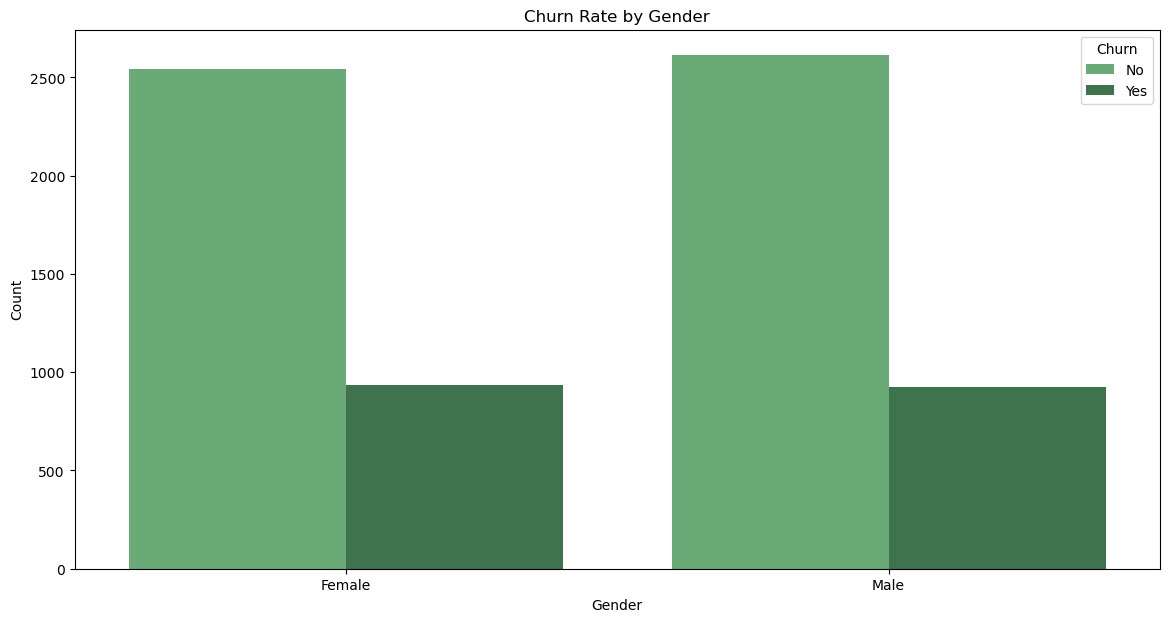

In [26]:
# Distribution of Churn Rate by Gender
plt.figure(figsize=(14, 7))  
sns.countplot(x='gender', hue='Churn', data=dt, palette="Greens_d")
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

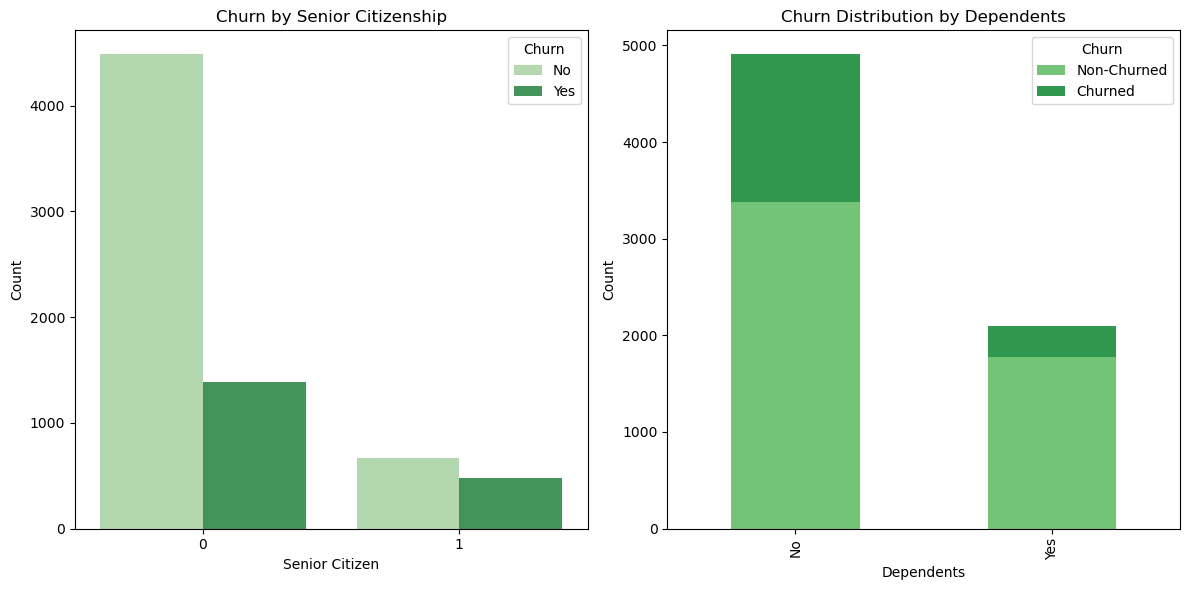

In [27]:
# Distribution olf senior citizen and Dependant

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Churn by Senior Citizenship

sns.countplot(x='SeniorCitizen', hue='Churn', data=dt, palette="Greens", ax=axes[0])
axes[0].set_title('Churn by Senior Citizenship')
axes[0].set_xlabel('Senior Citizen')
axes[0].set_ylabel('Count')

# Churn Distribution by Dependents

colors = plt.cm.Greens([0.5, 0.7]) 
dt_grouped = dt.groupby(['Dependents', 'Churn']).size().unstack()
dt_grouped.plot(kind='bar', stacked=True, color=colors, ax=axes[1])
axes[1].set_title('Churn Distribution by Dependents')
axes[1].set_xlabel('Dependents')
axes[1].set_ylabel('Count')
axes[1].legend(title='Churn', labels=['Non-Churned', 'Churned'])

# Adjust layout
plt.tight_layout()
plt.show()

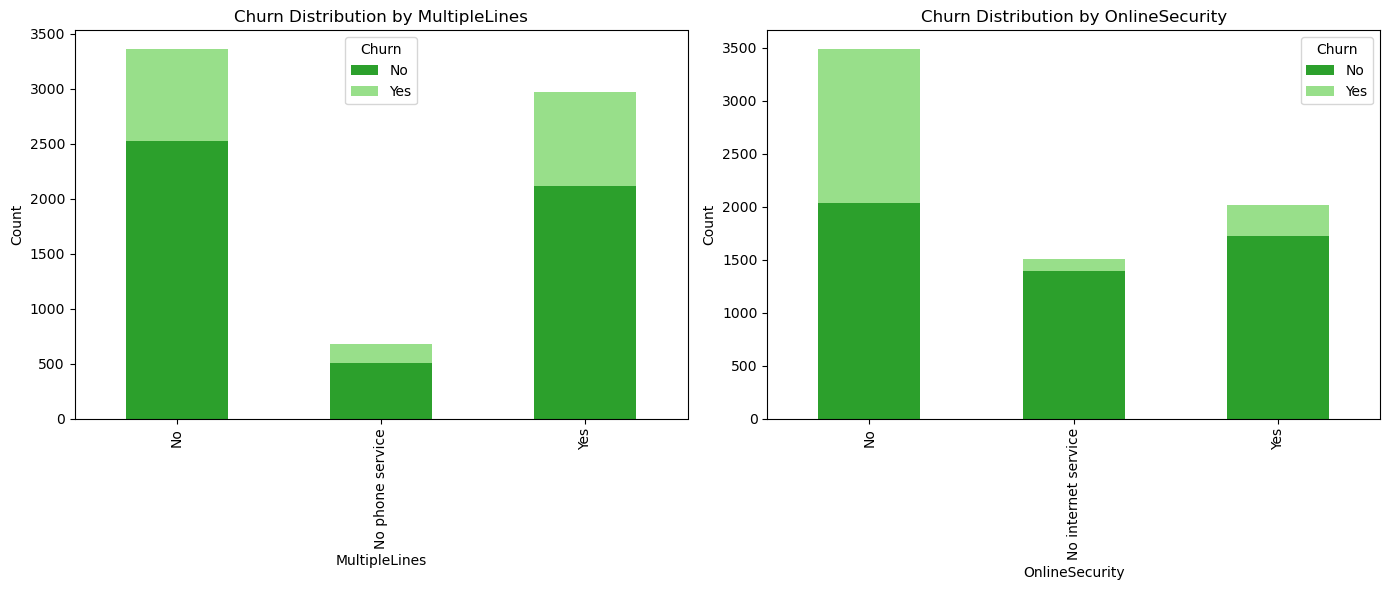

In [28]:
# Distribution of Chrun by Multiplelines and Online security

custom_colors = ['#2ca02c', '#98df8a'] 
custom_palette = ListedColormap(custom_colors)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Churn Distribution by MultipleLines
df_grouped_multiple_lines = dt.groupby(["MultipleLines", "Churn"]).size().unstack()
df_grouped_multiple_lines.plot(kind="bar", stacked=True, ax=axes[0], colormap=custom_palette)
axes[0].set_title("Churn Distribution by MultipleLines")
axes[0].set_xlabel("MultipleLines")
axes[0].set_ylabel("Count")

# Churn Distribution by OnlineSecurity
df_grouped_online_security = dt.groupby(["OnlineSecurity", "Churn"]).size().unstack()
df_grouped_online_security.plot(kind="bar", stacked=True, ax=axes[1], colormap=custom_palette)
axes[1].set_title("Churn Distribution by OnlineSecurity")
axes[1].set_xlabel("OnlineSecurity")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

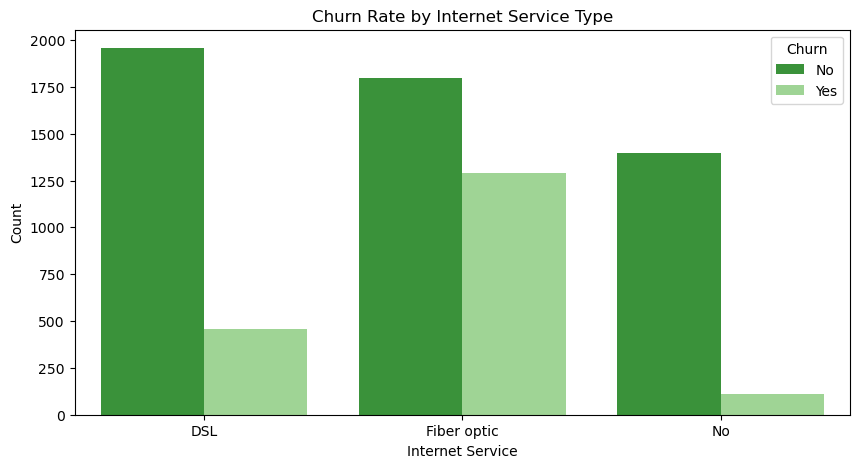

In [29]:
# Churn rate by Internet service type

# Set the color palette to match the green shades in the image
bar_palette = ["#2ca02c", "#98df8a"]  

plt.figure(figsize=(10, 5)) 
sns.countplot(x='InternetService', hue='Churn', data=dt, palette=bar_palette)
plt.title('Churn Rate by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

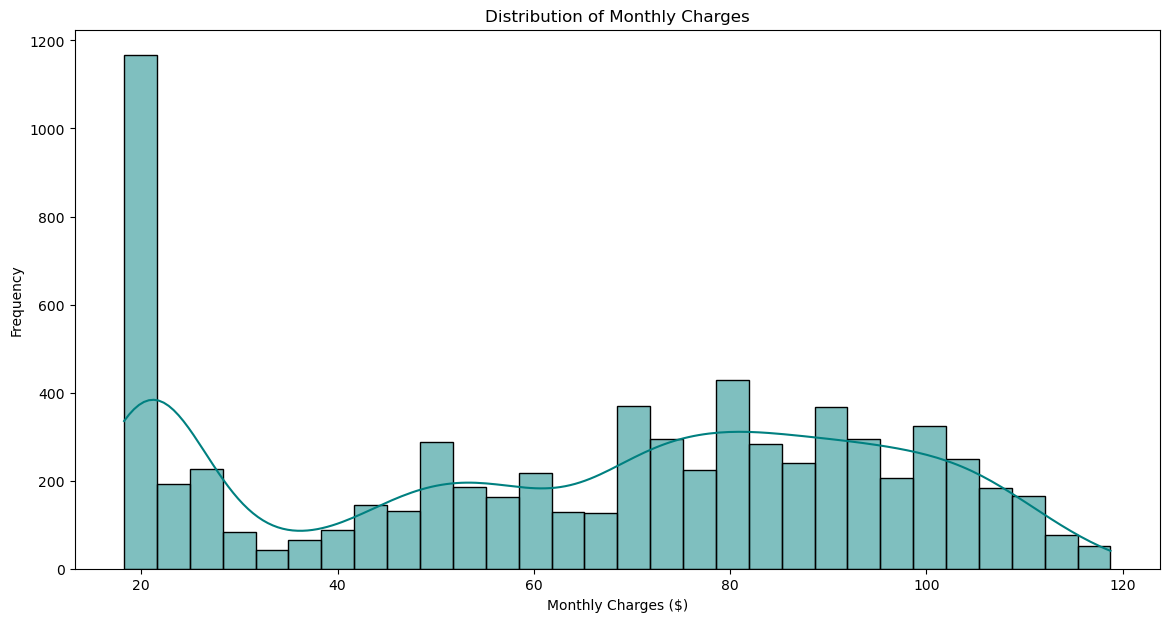

In [30]:
# Distribution by Monthly Charges

plt.figure(figsize=(14, 7))  
sns.histplot(dt['MonthlyCharges'], bins=30, kde=True, color='teal') 
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')
plt.show()

In [31]:
dt

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


ENCODED

In [32]:
# using label encoder
target = 'Churn'
# Create a LabelEncoder object
le = LabelEncoder()
dt[target] = le.fit_transform(dt[target])



CALCULATING THE CORRELATION MATRIX

C:\Users\c2441395\AppData\Local\Temp\ipykernel_736\562889913.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dt.corr()


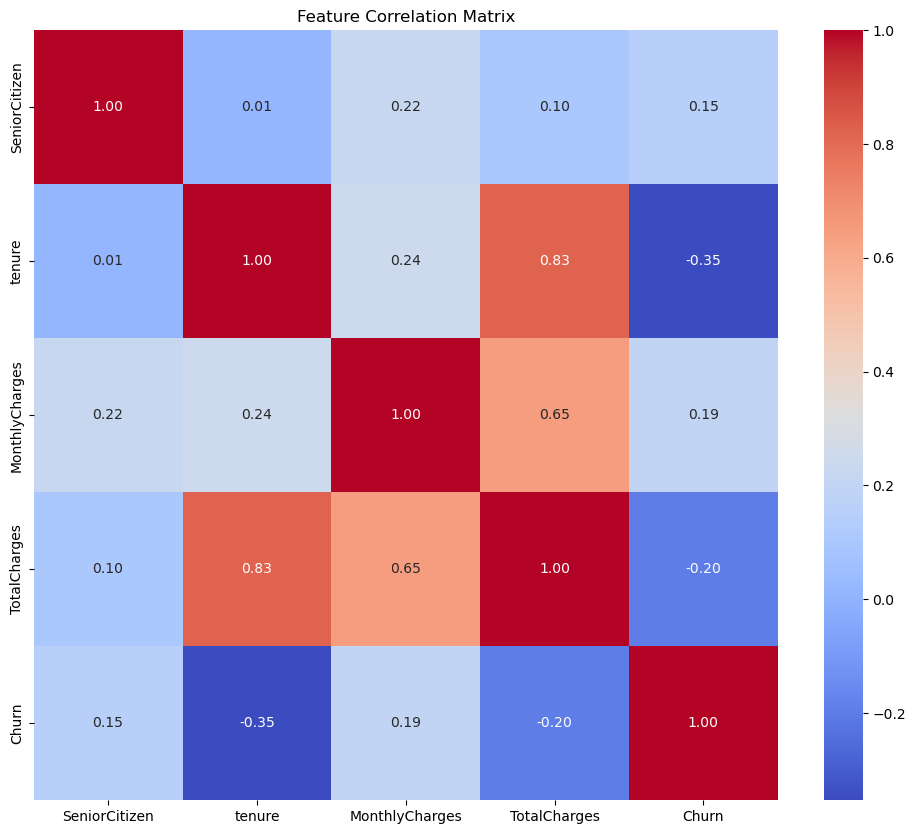

In [33]:
# Calculate the correlation matrix
corr = dt.corr()
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Matrix')
plt.show()

In [34]:
dt = pd.get_dummies(dt)

In [35]:
dt

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


VIEW THE ENCODED

In [36]:
dt.dtypes

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int32
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No              

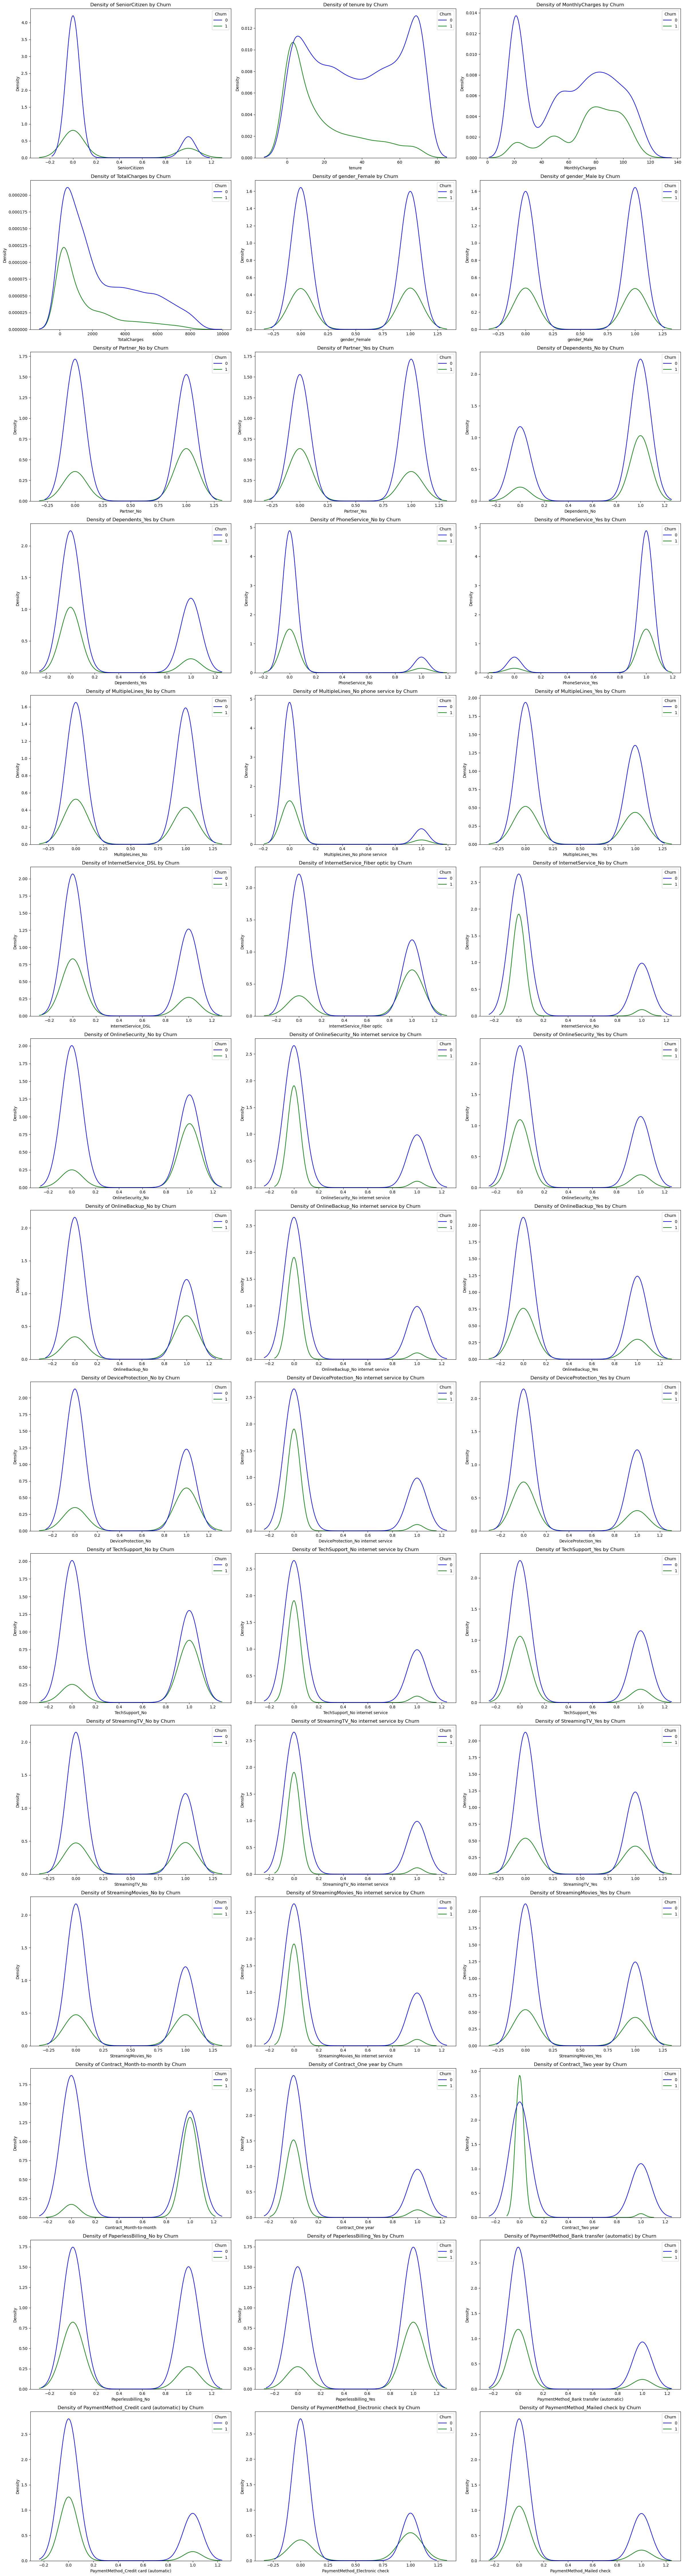

In [37]:
# Plotting the distribution of each feature with the target variable using density plot
# Setting Color Palette
colors = ['blue', 'green']
sns.set_palette(colors)

# Exclude 'Customer Status' if it's not the target, replace 'Churn' with your target column
numerical_features = [col for col in dt.columns if col != 'Churn']

# Defining the number of rows and columns for the grid
num_cols = 3
num_rows = (len(numerical_features) + num_cols - 1) // num_cols

# Creating a new figure outside of the loop
plt.figure(figsize=(8 * num_cols, 6 * num_rows))

# Plotting the distribution 
for i, feature in enumerate(numerical_features):
    # Create a new subplot
    ax = plt.subplot(num_rows, num_cols, i + 1)
    # Plot density plot
    sns.kdeplot(data=dt, x=feature, hue='Churn', ax=ax)  # Use 'hue' to color by 'Customer Status'
    plt.title(f"Density of {feature} by Churn")
    plt.xlabel(feature)
    plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.savefig('Distribution of feature with the target variable using Density Plot.jpg')
plt.show()


CHECKING FOR COLUMNS WITH MISSING VALUES

In [38]:
# Getting list of columns having missing values
missing_columns = [col for col in dt.columns if dt[col].isnull().sum() > 0]
missing_columns

[]

SPLITTED THE DATASET INTO TWO GROUPS: 20% FOR TESTING AND 80% FOR TRAINING.

In [37]:
# Define features and target variable
X = dt.drop('Churn', axis=1)  
y = dt['Churn'] 
# shuffled the data
X, y = shuffle(X, y, random_state=42)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# viewed the target virable after shuffled
print(y)

6882    0
6752    0
245     0
1889    0
6830    0
       ..
3787    0
5210    1
5246    1
5410    0
862     1
Name: Churn, Length: 7010, dtype: int32


In [39]:
dt.isnull().sum()


SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBack

FEATURE SELECTION

The feature selection helps us to deal with only the features that are statistically relevant to our dataset. We apply the 
ANOVA F-value to identify the top ten features that are relevant to our target variables.

In [40]:
# select the columns statistical relevance to our tarhet variable usin ANOVA F-value
# Select top 10 features using ANOVA F-value test
selector = SelectKBest(score_func=f_classif, k=10)
x_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_features = selector.get_support(indices=True)

# Print the selected feature names
feature_names = list(X.columns[selected_features])
print(feature_names)


['tenure', 'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 'StreamingMovies_No internet service', 'Contract_Month-to-month', 'Contract_Two year', 'PaymentMethod_Electronic check']


In [41]:
dt

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


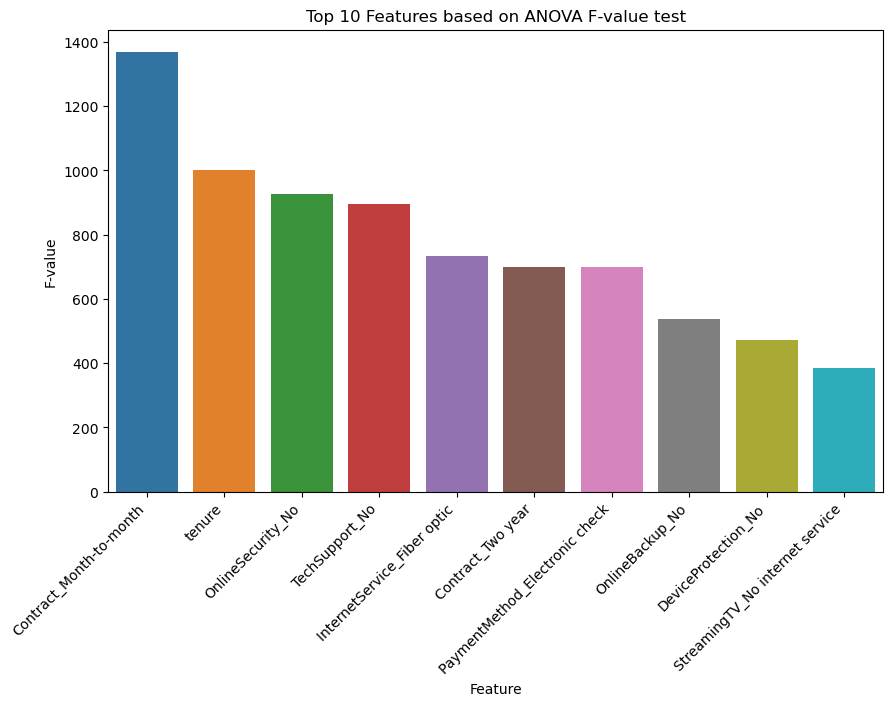

In [42]:
# select the columns statistical relevance to our tarhet variable usin ANOVA F-value

# create a new DataFrame with the selected columns
data = dt

# perform ANOVA F-value test
f_values, p_values = f_classif(X, y)

# create a DataFrame with the F-values and corresponding feature names
f_df = pd.DataFrame({'feature': X.columns, 'F-value': f_values})

# sort the DataFrame by F-value in descending order and select the top 10 features
top_features = f_df.sort_values(by='F-value', ascending=False).head(10)

# plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='feature', y='F-value', data=top_features)
plt.title('Top 10 Features based on ANOVA F-value test')
plt.xlabel('Feature')
plt.ylabel('F-value')
plt.xticks(rotation=45, ha='right')
plt.show()

NORMALIZATION

In [43]:
#Standardizing the data using Standard Scaler

# Extract the top 10 features
top_features = feature_names#['SeniorCitizen', 'Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'MonthlyCharges']
# Keep only the top 10 features in the training and testing data
X_train = X_train[top_features]
X_test = X_test[top_features]

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaler, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaler, columns=X_test.columns)


display(X_train.head())
display(X_test.head())

,tenure,InternetService_Fiber optic,OnlineSecurity_No,OnlineBackup_No,DeviceProtection_No,TechSupport_No,StreamingMovies_No internet service,Contract_Month-to-month,Contract_Two year,PaymentMethod_Electronic check
0,-1.163380,-0.874432,1.009316,1.128773,1.127956,1.011839,-0.524800,0.918766,-0.571585,-0.707296
1,-0.960555,-0.874432,-0.990770,-0.885918,-0.886559,-0.988300,1.905488,-1.088417,-0.571585,1.413835
2,0.864871,-0.874432,-0.990770,-0.885918,-0.886559,-0.988300,1.905488,-1.088417,1.749522,-0.707296
3,-0.270949,1.143599,1.009316,1.128773,1.127956,1.011839,-0.524800,0.918766,-0.571585,1.413835
4,1.595041,-0.874432,-0.990770,-0.885918,-0.886559,-0.988300,-0.524800,-1.088417,1.749522,-0.707296


,tenure,InternetService_Fiber optic,OnlineSecurity_No,OnlineBackup_No,DeviceProtection_No,TechSupport_No,StreamingMovies_No internet service,Contract_Month-to-month,Contract_Two year,PaymentMethod_Electronic check
0,0.337526,1.143599,1.009316,-0.885918,1.127956,1.011839,-0.524800,0.918766,-0.571585,1.413835
1,0.864871,1.143599,-0.990770,1.128773,-0.886559,1.011839,-0.524800,0.918766,-0.571585,-0.707296
2,0.296961,-0.874432,-0.990770,-0.885918,-0.886559,1.011839,-0.524800,-1.088417,-0.571585,-0.707296
3,-0.433210,-0.874432,-0.990770,1.128773,1.127956,1.011839,-0.524800,0.918766,-0.571585,1.413835
4,-0.514340,-0.874432,-0.990770,-0.885918,-0.886559,-0.988300,1.905488,0.918766,-0.571585,-0.707296


In [44]:
# checking the shape of the train and test datasets

print("The shape of x_train_scaler is: ",X_train_scaler.shape)
print("The shape of x_test_scaler is: ",X_test_scaler.shape)
print("The shape of y_train is: ",y_train.shape)
print("The shape of y_test is: ",y_test.shape)

The shape of x_train_scaler is:  (5608, 10)
The shape of x_test_scaler is:  (1402, 10)
The shape of y_train is:  (5608,)
The shape of y_test is:  (1402,)


IMPLEMENTATION OF MODELS

In [45]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
warnings.filterwarnings('ignore', category=UserWarning)

# Adding all initialized models to the list
model_list = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(), SVC(), KNeighborsClassifier(), xgb_model]

train_acc = []
test_acc = []

for i in model_list:
    i_model = i.fit(X_train_scaler,y_train)
    y_train_pred = i_model.predict(X_train_scaler)
    y_test_pred = i_model.predict(X_test_scaler)
    train_acc.append(accuracy_score(y_train,y_train_pred))
    test_acc.append(accuracy_score(y_test,y_test_pred))
    

C:\ProgramData\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [46]:
classifiers = {
    'Lr': LogisticRegression(),
    'Dt': DecisionTreeClassifier(),
    'Rf': RandomForestClassifier(),
    'Gb': GradientBoostingClassifier(),
    'Nb': GaussianNB(),
    'Svm': SVC(),
    'Knn': KNeighborsClassifier(),
    'Xgb': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Loop through the classifiers, fit, predict, and display the classification report
for name, clf in classifiers.items():
    # Fitting the model to the training data
    clf.fit(X_train_scaler, y_train)  # Make sure X_train_scaler and y_train are defined
    
    # Making predictions
    y_pred = clf.predict(X_test_scaler)
    
    # Printing the classification report
    print('Classification Report for:', name)
    print(classification_report(y_test, y_pred)) 

Classification Report for: Lr
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1029
           1       0.62      0.52      0.57       373

    accuracy                           0.79      1402
   macro avg       0.73      0.70      0.71      1402
weighted avg       0.78      0.79      0.78      1402

Classification Report for: Dt
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1029
           1       0.50      0.47      0.48       373

    accuracy                           0.73      1402
   macro avg       0.66      0.65      0.65      1402
weighted avg       0.73      0.73      0.73      1402

Classification Report for: Rf
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1029
           1       0.53      0.52      0.52       373

    accuracy                           0.75      1402
   macro avg       0.68      0.68     

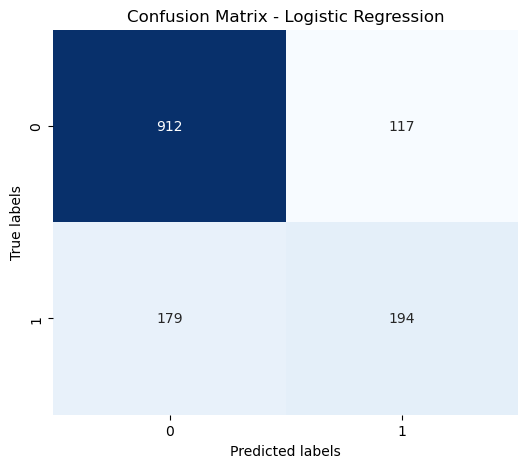

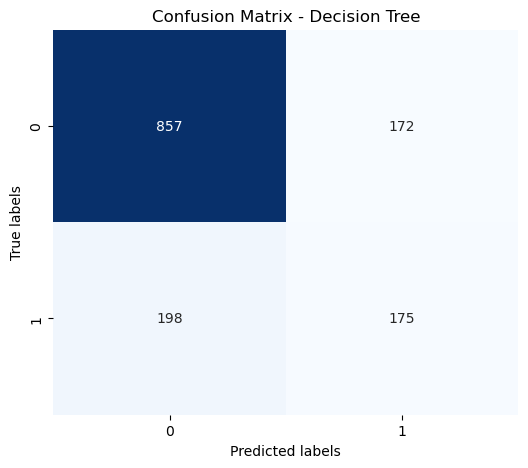

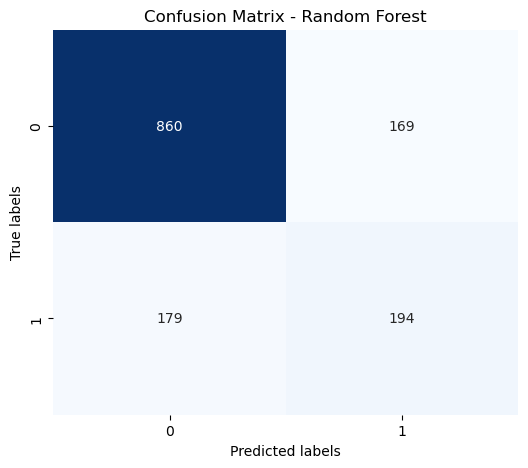

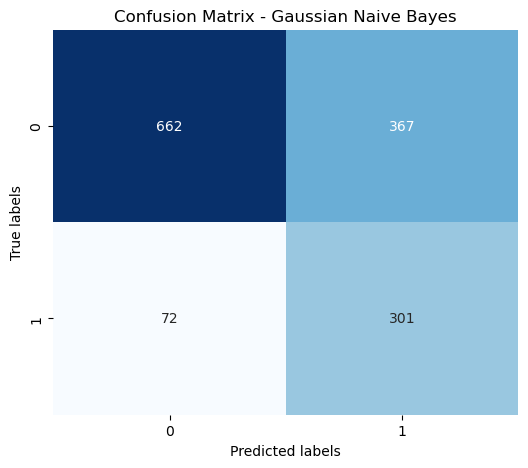

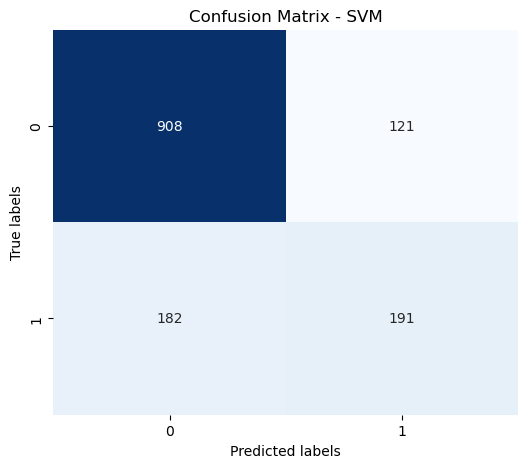

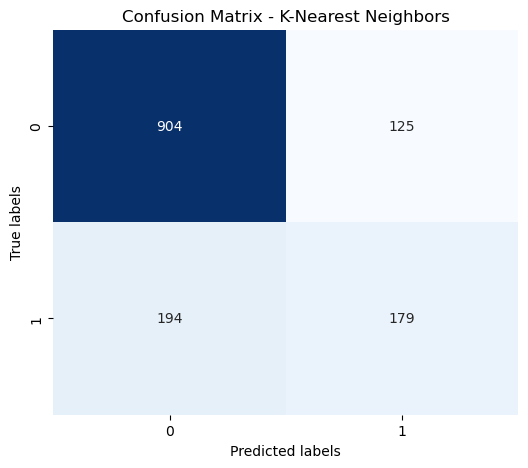

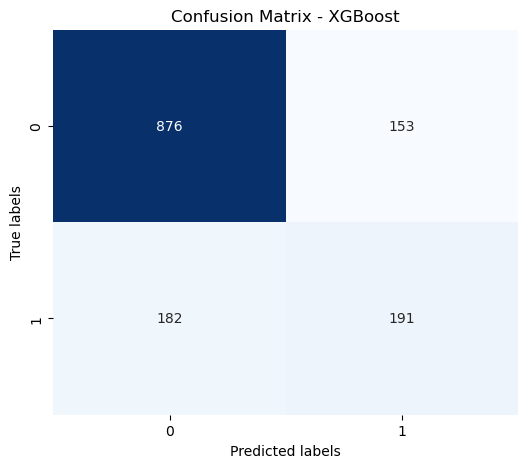

In [47]:
#plot confusion matrix
model_list = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    SVC(),
    KNeighborsClassifier(),
    xgb_model  
]

model_names = [
    'Logistic Regression',
    'Decision Tree',
    'Random Forest',
    'Gaussian Naive Bayes',
    'SVM',
    'K-Nearest Neighbors',
    'XGBoost'
]

for i, model in enumerate(model_list):
    # Fit the model to the training data
    model.fit(X_train_scaler, y_train)
   
    # Make predictions on the test data
    y_pred = model.predict(X_test_scaler)
   
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)  
    
    # Plot the confusion matrix
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - {model_names[i]}")
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

Comparing the model performance

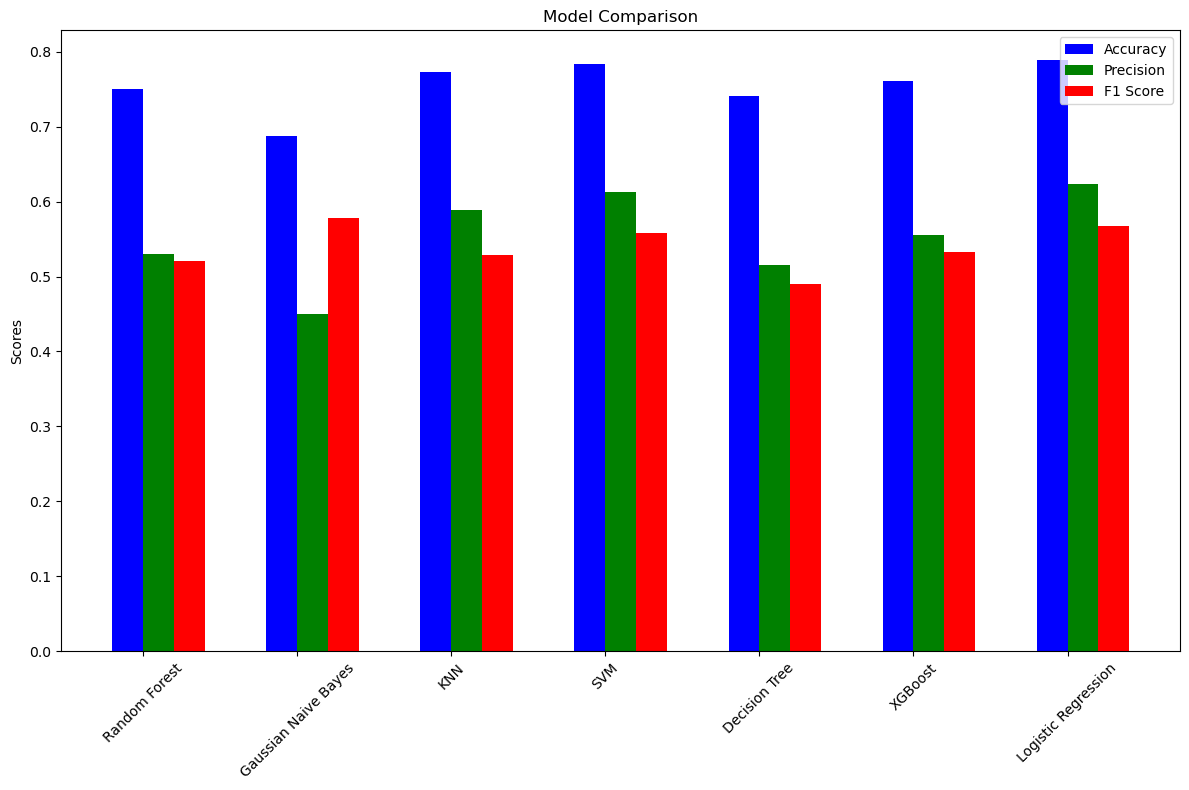

In [48]:
#Perfomnce comparison
# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss', random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000) 
}

# Dictionary to hold scores for each classifier
scores = {name: {'Accuracy': None, 'Precision': None, 'F1 Score': None} for name in classifiers}

# Fit each model and compute scores
for name, clf in classifiers.items():
    clf.fit(X_train_scaler, y_train)
    y_pred = clf.predict(X_test_scaler)
    scores[name]['Accuracy'] = accuracy_score(y_test, y_pred)
    scores[name]['Precision'] = precision_score(y_test, y_pred, zero_division=0)
    scores[name]['F1 Score'] = f1_score(y_test, y_pred)

# Plotting
fig, ax = plt.subplots(figsize=[12, 8])
x = np.arange(len(classifiers))
width = 0.2

# Extracting the scores for plotting
accuracy_scores = [scores[name]['Accuracy'] for name in classifiers]
precision_scores = [scores[name]['Precision'] for name in classifiers]
f1_scores = [scores[name]['F1 Score'] for name in classifiers]

# Plotting the bars
ax.bar(x - width/2, accuracy_scores, width, label='Accuracy', color='blue')
ax.bar(x + width/2, precision_scores, width, label='Precision', color='green')
ax.bar(x + width*1.5, f1_scores, width, label='F1 Score', color='red')

# Setting labels, titles, and custom ticks
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(classifiers.keys(), rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


List of the Trained and test Scores of all the models

In [49]:
model_list = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(), SVC(), KNeighborsClassifier(), xgb_model]


model_dict = {'Model':model_list,'Train Score':train_acc,'Test Score':test_acc}
model_dict

{'Model': [LogisticRegression(),
  DecisionTreeClassifier(),
  RandomForestClassifier(),
  GaussianNB(),
  SVC(),
  KNeighborsClassifier(),
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric='logloss',
                feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, n_estimators=100, n_jobs=None,
                num_parallel_tree=None, predictor=None, random_state=None, ...)],
 'Train Score': [0.801355206847361,
  0.8917617689015692,
  0.8914051355206848,

In [50]:
# summary table plot 
model_summary = pd.DataFrame({'Model':model_list,'Train Score':train_acc,'Test Score':test_acc})
model_summary


,Model,Train Score,Test Score
0,LogisticRegression(),0.801355,0.788873
1,DecisionTreeClassifier(),0.891762,0.737518
2,RandomForestClassifier(),0.891405,0.746077
3,GaussianNB(),0.724679,0.686876
4,SVC(),0.799394,0.783880
5,KNeighborsClassifier(),0.826498,0.772468
6,"XGBClassifier(base_score=None, booster=None, c...",0.848609,0.761056


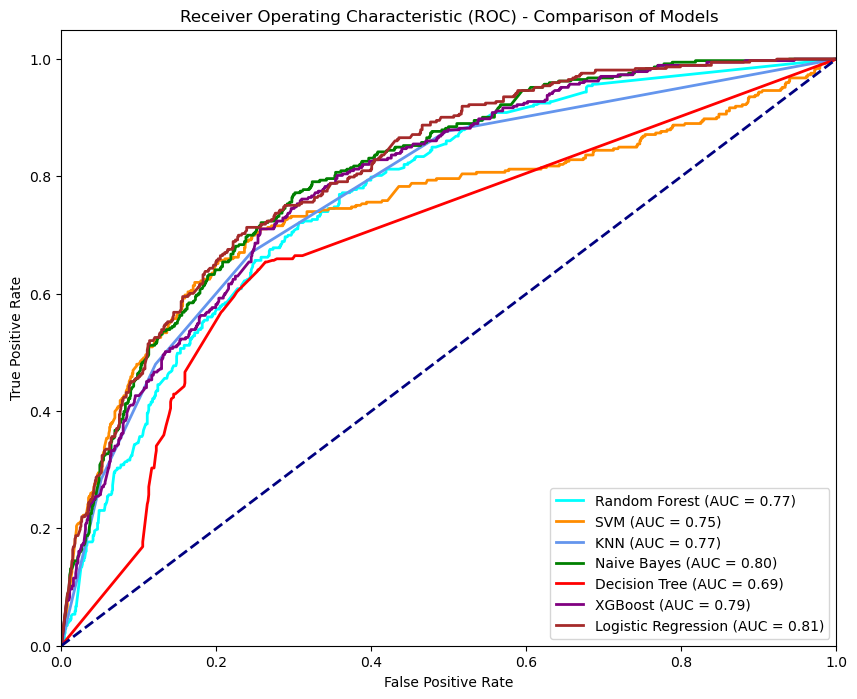

In [51]:
#create model list for ROC curve

# Dictionary to hold models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown'])

# Figure for plotting
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Fit and predict probabilities
    model.fit(X_train_scaler, y_train)
    if hasattr(model, "predict_proba"):
        probas_ = model.predict_proba(X_test_scaler)
        fpr, tpr, _ = roc_curve(y_test, probas_[:, 1])
    elif hasattr(model, "decision_function"):  
        scores_ = model.decision_function(X_test_scaler)
        fpr, tpr, _ = roc_curve(y_test, scores_)
    
    # Compute AUC
    roc_auc = roc_auc_score(y_test, probas_[:, 1])  
    plt.plot(fpr, tpr, lw=lw, label=f'{name} (AUC = {roc_auc:.2f})', color=next(colors))

# No-skill line (diagonal)
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='navy')

# Formatting the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Comparison of Models')
plt.legend(loc="lower right")

plt.show()

OPTIMIZED THE MODELS

Resampling the dataset

In [52]:
!pip install imblearn


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
y,X = dt['Churn'] ,dt.drop('Churn',axis=1) 

In [54]:
# using smote method to resample
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [55]:
y_res.value_counts()

0    5153
1    5153
Name: Churn, dtype: int64

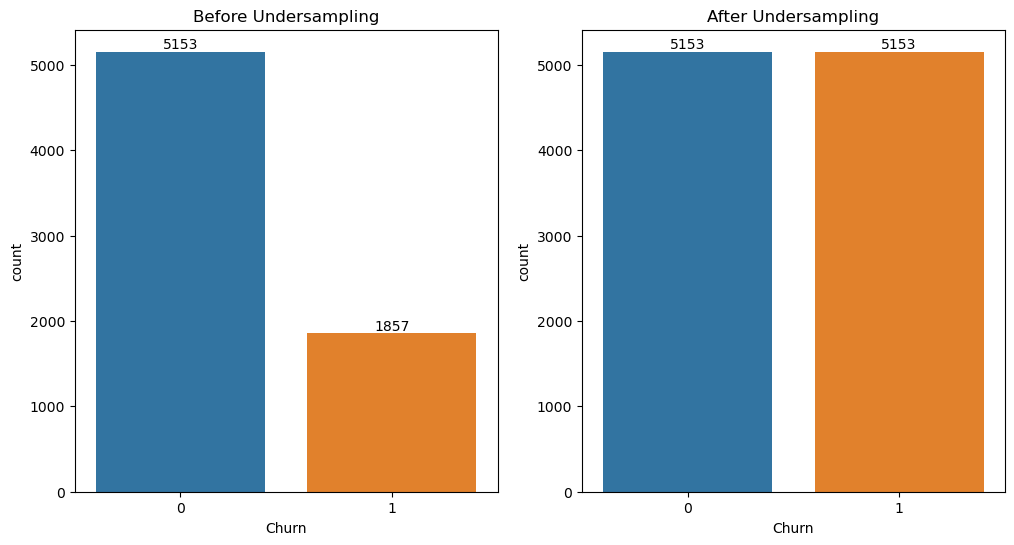

In [56]:
# Plot distribution of target variable before and after undersampling
fig, axs = plt.subplots(ncols=2, figsize=(12,6))
sns.countplot(data=dt, x='Churn', ax=axs[0])  
axs[0].bar_label(axs[0].containers[0])
axs[0].set_title('Before Undersampling')
X_res_temp = X_res.copy()
X_res_temp['Churn'] =  y_res
sns.countplot(data=X_res_temp, x='Churn', ax=axs[1])  
axs[1].bar_label(axs[1].containers[0])
axs[1].set_title('After Undersampling')

plt.show()

In [57]:
top_features =  feature_names#['SeniorCitizen', 'Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'MonthlyCharges']
X_res =X_res[top_features]

# Split into training and testing sets
X_train_std, X_test_std, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Scale the training and testing data separately
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train_std)
X_test_scaler = scaler.transform(X_test_std)

# Convert the scaled arrays to Pandas DataFrames with feature names
X_train_scaler = pd.DataFrame(X_train_scaler, columns=X_res.columns)
X_test_scaler = pd.DataFrame(X_test_scaler, columns=X_res.columns)

# Print the shapes of the new datasets
print("Shape of x_train_scaler:", X_train_scaler.shape)
print("Shape of x_test_scaler:", X_test_scaler.shape)
print("Shape of y_train_res:", y_train_res.shape)
print("Shape of y_test_res:", y_test_res.shape)

Shape of x_train_scaler: (8244, 10)
Shape of x_test_scaler: (2062, 10)
Shape of y_train_res: (8244,)
Shape of y_test_res: (2062,)


In [58]:
y_test_res.value_counts()

0    1036
1    1026
Name: Churn, dtype: int64

Model Revaluation

In [59]:
# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42, probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss', random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000) 
}

# Prepare the cross-validation procedure
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation for each model
for name, model in classifiers.items():
    cv_results = cross_val_score(model, X_train_scaler, y_train_res, cv=kf, scoring='accuracy')
    print(f"Accuracy for {name}: {cv_results}")
    print(f"Average accuracy for {name}: {cv_results.mean():.4f}\n")

Accuracy for Random Forest: [0.74590661 0.76228017 0.75379018 0.77865373 0.77548544]
Average accuracy for Random Forest: 0.7632

Accuracy for Gaussian Naive Bayes: [0.71012735 0.72346877 0.71194663 0.73256519 0.70206311]
Average accuracy for Gaussian Naive Bayes: 0.7160

Accuracy for KNN: [0.74833232 0.7543966  0.75803517 0.77562159 0.7506068 ]
Average accuracy for KNN: 0.7574

Accuracy for SVM: [0.75197089 0.75379018 0.75742874 0.77562159 0.75788835]
Average accuracy for SVM: 0.7593

Accuracy for Decision Tree: [0.73135233 0.73984233 0.73377805 0.75803517 0.75364078]
Average accuracy for Decision Tree: 0.7433

Accuracy for XGBoost: [0.74408733 0.75379018 0.75257732 0.7780473  0.77669903]
Average accuracy for XGBoost: 0.7610

Accuracy for Logistic Regression: [0.74408733 0.74833232 0.74469375 0.76167374 0.74575243]
Average accuracy for Logistic Regression: 0.7489



In [60]:
# Grid search

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss', random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000) 
}

# Hyperparameter grids
param_grid = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    'Gaussian Naive Bayes': {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }
}



In [61]:

best_estimators = {}
best_parameters = {}
training_accuracies = {}
test_accuracies = {}


for name, classifier in classifiers.items():
    grid_search = GridSearchCV(estimator=classifier, 
                               param_grid=param_grid[name], 
                               cv=5, 
                               scoring='accuracy', 
                               n_jobs=-1)
    grid_search.fit(X_train_scaler, y_train_res)
    
    # Best estimator for the current classifier
    best_estimators[name] = grid_search.best_estimator_
    best_parameters[name] = grid_search.best_params_
    
    # Training accuracy of the best estimator
    training_accuracy = grid_search.best_score_
    training_accuracies[name] = training_accuracy
    
    # Test accuracy of the best estimator
    y_pred_test = best_estimators[name].predict(X_test_scaler)
    test_accuracy = accuracy_score(y_test_res, y_pred_test)
    test_accuracies[name] = test_accuracy
    
    # Print out the results
    print(f"{name}:")
    print("Best Parameters:", best_parameters[name])
    print("Best Cross-Validation Accuracy (Training):", training_accuracy)
    print("Test Set Accuracy:", test_accuracy)
    print("=" * 60)




Random Forest:
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best Cross-Validation Accuracy (Training): 0.7774151147797724
Test Set Accuracy: 0.7895247332686712
Gaussian Naive Bayes:
Best Parameters: {'var_smoothing': 1e-09}
Best Cross-Validation Accuracy (Training): 0.7165215605809936
Test Set Accuracy: 0.7182347235693501
KNN:
Best Parameters: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Best Cross-Validation Accuracy (Training): 0.7575218431882812
Test Set Accuracy: 0.7628516003879728
SVM:
Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Cross-Validation Accuracy (Training): 0.7629797700283196
Test Set Accuracy: 0.7599418040737148
Decision Tree:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Cross-Validation Accuracy (Training): 0.7584900675313664
Test Set Accuracy: 0.7696411251212415
XGBoost:
Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100}
Best Cross-Validation Accuracy (Trai

In [62]:
# Model Classification reports
model_list = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    SVC(),
    KNeighborsClassifier(),
    xgb_model  
]

model_names = [
    'Logistic Regression',
    'Decision Tree',
    'Random Forest',
    'Gaussian Naive Bayes',
    'SVM',
    'K-Nearest Neighbors',
    'XGBoost'
]

for i, model in enumerate(model_list):
    # Fit the model to the training data
    model.fit(X_train_scaler, y_train_res)
   
    # Make predictions on the test data
    y_pred = model.predict(X_test_scaler)
   
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test_res, y_pred)
    # Get classification report
    report = classification_report(y_test_res, y_pred)
   
    # Display results
    print(f"Results for {model_names[i]}:")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)
    print("=" * 80 + "\n")


Results for Logistic Regression:
Confusion Matrix:
[[718 318]
 [211 815]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.69      0.73      1036
           1       0.72      0.79      0.75      1026

    accuracy                           0.74      2062
   macro avg       0.75      0.74      0.74      2062
weighted avg       0.75      0.74      0.74      2062


Results for Decision Tree:
Confusion Matrix:
[[775 261]
 [222 804]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1036
           1       0.75      0.78      0.77      1026

    accuracy                           0.77      2062
   macro avg       0.77      0.77      0.77      2062
weighted avg       0.77      0.77      0.77      2062


Results for Random Forest:
Confusion Matrix:
[[752 284]
 [178 848]]
Classification Report:
              precision    recall  f1-score   support

          

Model Comparison after Resampled

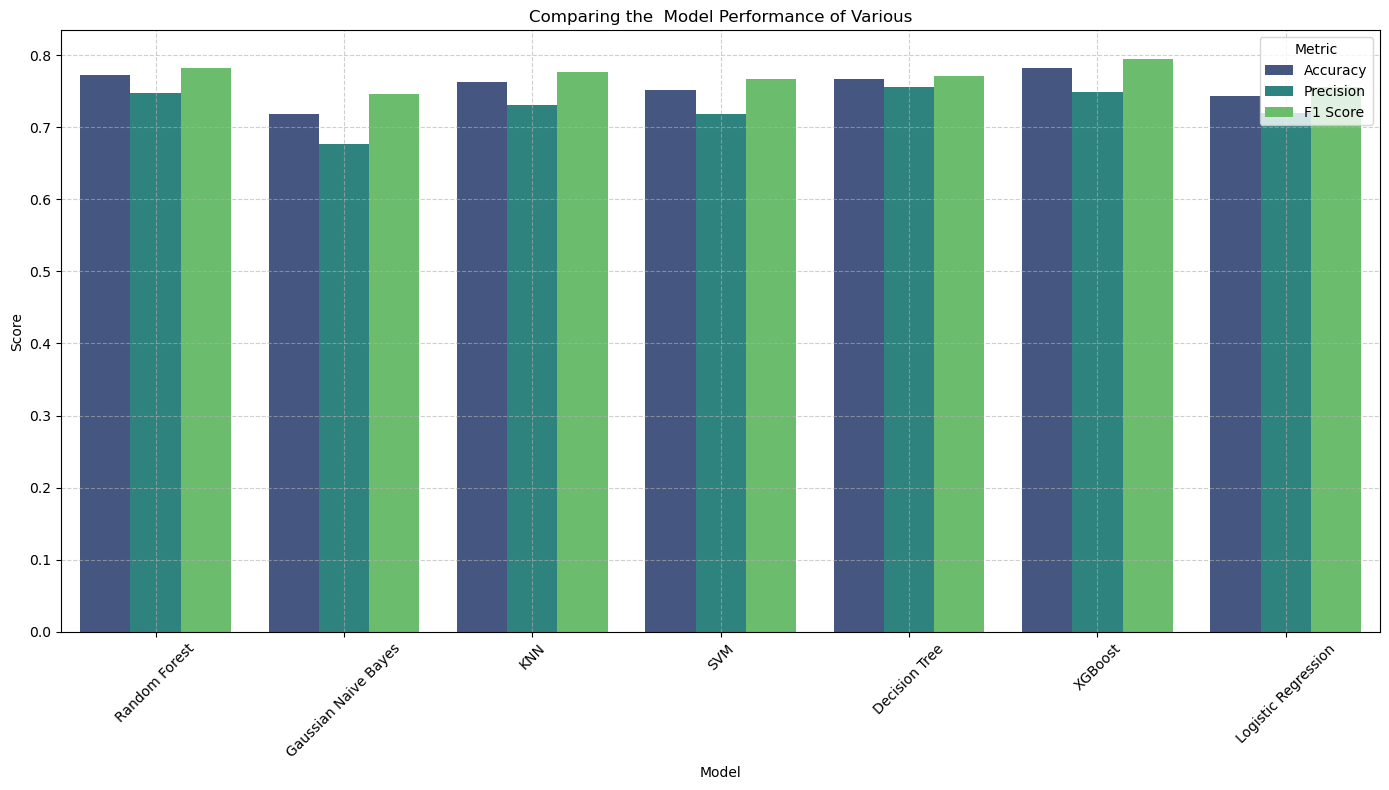

In [63]:
# model comparison
# DataFrame to store all scores
score_data = pd.DataFrame(columns=['Model', 'Metric', 'Score'])

# Compute scores for each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_scaler, y_train_res)
    y_pred = clf.predict(X_test_scaler)
    scores = {
        'Accuracy': accuracy_score(y_test_res, y_pred),
        'Precision': precision_score(y_test_res, y_pred, average='binary', zero_division=0),
        'F1 Score': f1_score(y_test_res, y_pred, average='binary')
    }
    
    # Append to DataFrame using concat
    for metric, score in scores.items():
        new_row = pd.DataFrame({'Model': [name], 'Metric': [metric], 'Score': [score]})
        score_data = pd.concat([score_data, new_row], ignore_index=True)

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.barplot(data=score_data, x='Model', y='Score', hue='Metric', palette='viridis')
plt.title('Comparing the  Model Performance of Various')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


After the model has been optimised, another ROC curve is drawn to examine its performance. Furthermore, the best-performing 
model might be determined to be the Random Forest Sampling model.

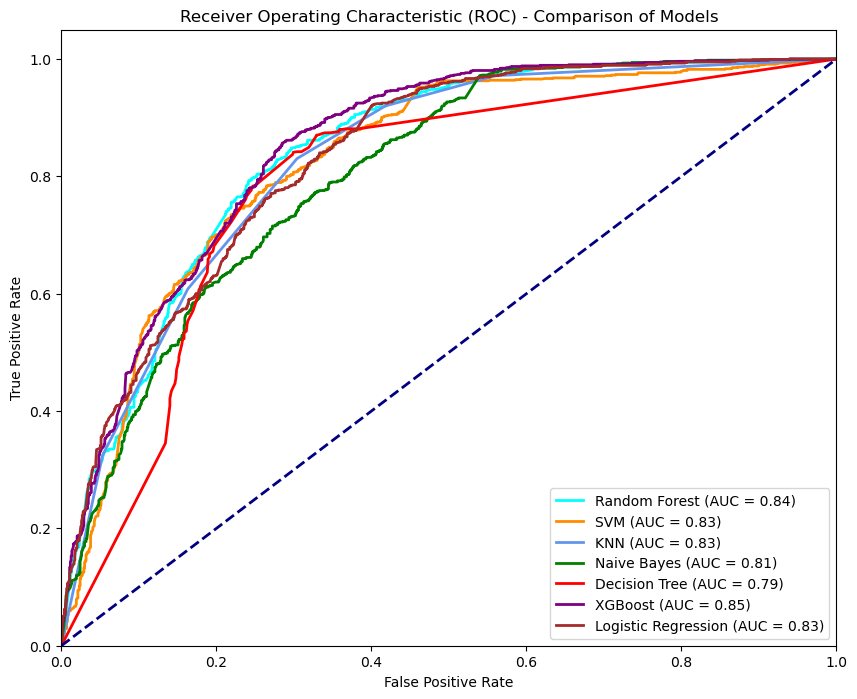

In [64]:
# Dictionary to hold models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown'])

# Figure for plotting
plt.figure(figsize=(10, 8))
for name, model in models.items():
    # Fit and predict probabilities
    model.fit(X_train_scaler, y_train_res)  # Ensure X_train_scaler and y_train_res are correctly paired
    if hasattr(model, "predict_proba"):
        probas_ = model.predict_proba(X_test_scaler)  # Assuming X_test_scaler is correct
        fpr, tpr, _ = roc_curve(y_test_res, probas_[:, 1])  # Ensure y_test_res is correct here
    elif hasattr(model, "decision_function"):
        scores_ = model.decision_function(X_test_scaler)
        fpr, tpr, _ = roc_curve(y_test_res, scores_)
    
    # Compute AUC
    roc_auc = roc_auc_score(y_test_res, probas_[:, 1])  # Change y_test to y_test_res if that's the correct labels
    plt.plot(fpr, tpr, lw=lw, label=f'{name} (AUC = {roc_auc:.2f})', color=next(colors))


# No-skill line (diagonal)
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='navy')

# Formatting the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Comparison of Models')
plt.legend(loc="lower right")

plt.show()

FEATURE IMPORTANCE

This is to determine the significance of the features we employed for the project and the extent to which they improved the 
random forest algorithm's performance, which is the best performing model.

In [65]:
# Create a random forest classifier model
rf_model = RandomForestClassifier()

# Fit the model on the training data
rf_model.fit(X_train_scaler, y_train_res)

# Get the feature importances
importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})

importances['Feature_importances'] = rf_model.feature_importances_
importances


,Feature,Importance,Feature_importances
0,tenure,0.516242,0.516242
1,InternetService_Fiber optic,0.080466,0.080466
2,OnlineSecurity_No,0.036118,0.036118
3,OnlineBackup_No,0.029263,0.029263
4,DeviceProtection_No,0.030076,0.030076
5,TechSupport_No,0.037844,0.037844
6,StreamingMovies_No internet service,0.039593,0.039593
7,Contract_Month-to-month,0.104206,0.104206
8,Contract_Two year,0.101170,0.101170
9,PaymentMethod_Electronic check,0.025022,0.025022


In [66]:
imp = importances.sort_values(by='Feature_importances',ascending=False)
imp

,Feature,Importance,Feature_importances
0,tenure,0.516242,0.516242
7,Contract_Month-to-month,0.104206,0.104206
8,Contract_Two year,0.101170,0.101170
1,InternetService_Fiber optic,0.080466,0.080466
6,StreamingMovies_No internet service,0.039593,0.039593
5,TechSupport_No,0.037844,0.037844
2,OnlineSecurity_No,0.036118,0.036118
4,DeviceProtection_No,0.030076,0.030076
3,OnlineBackup_No,0.029263,0.029263
9,PaymentMethod_Electronic check,0.025022,0.025022


In [67]:
# Important features
imp['Feature'][0:7].values

array(['tenure', 'Contract_Month-to-month', 'Contract_Two year',
       'InternetService_Fiber optic',
       'StreamingMovies_No internet service', 'TechSupport_No',
       'OnlineSecurity_No'], dtype=object)

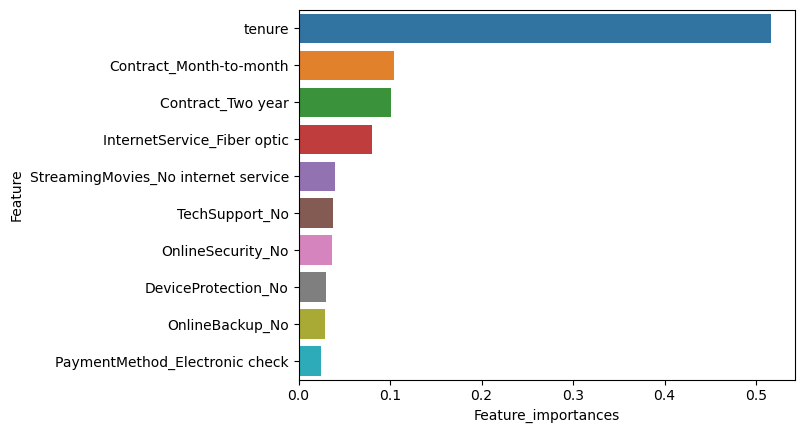

In [68]:
sns.barplot(y=imp['Feature'],x=imp['Feature_importances'])
plt.show()